In [1]:
# Decision Tree example
# Decide Whether Banking Customers with Churn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('initial_churn_data.txt')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
for i in df:
    print(i)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [7]:
#  INVESTIGATE ALL ELEMENTS WITHIN EACH FEATURE 
for column in df:
    unique_vals = np.unique(df[column])
    num_vals = len(unique_vals)
    if num_vals < 36:
        print(f'The number of values for feature {column}: {num_vals} --- {unique_vals}')
    else:
        print(f'The number of values for feature {column}: {num_vals}')

The number of values for feature RowNumber: 10000
The number of values for feature CustomerId: 10000
The number of values for feature Surname: 2932
The number of values for feature CreditScore: 460
The number of values for feature Geography: 3 --- ['France' 'Germany' 'Spain']
The number of values for feature Gender: 2 --- ['Female' 'Male']
The number of values for feature Age: 70
The number of values for feature Tenure: 11 --- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance: 6382
The number of values for feature NumOfProducts: 4 --- [1 2 3 4]
The number of values for feature HasCrCard: 2 --- [0 1]
The number of values for feature IsActiveMember: 2 --- [0 1]
The number of values for feature EstimatedSalary: 9999
The number of values for feature Exited: 2 --- [0 1]


In [8]:
# Check to see null values 

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Set up a pair plot! 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df2 = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

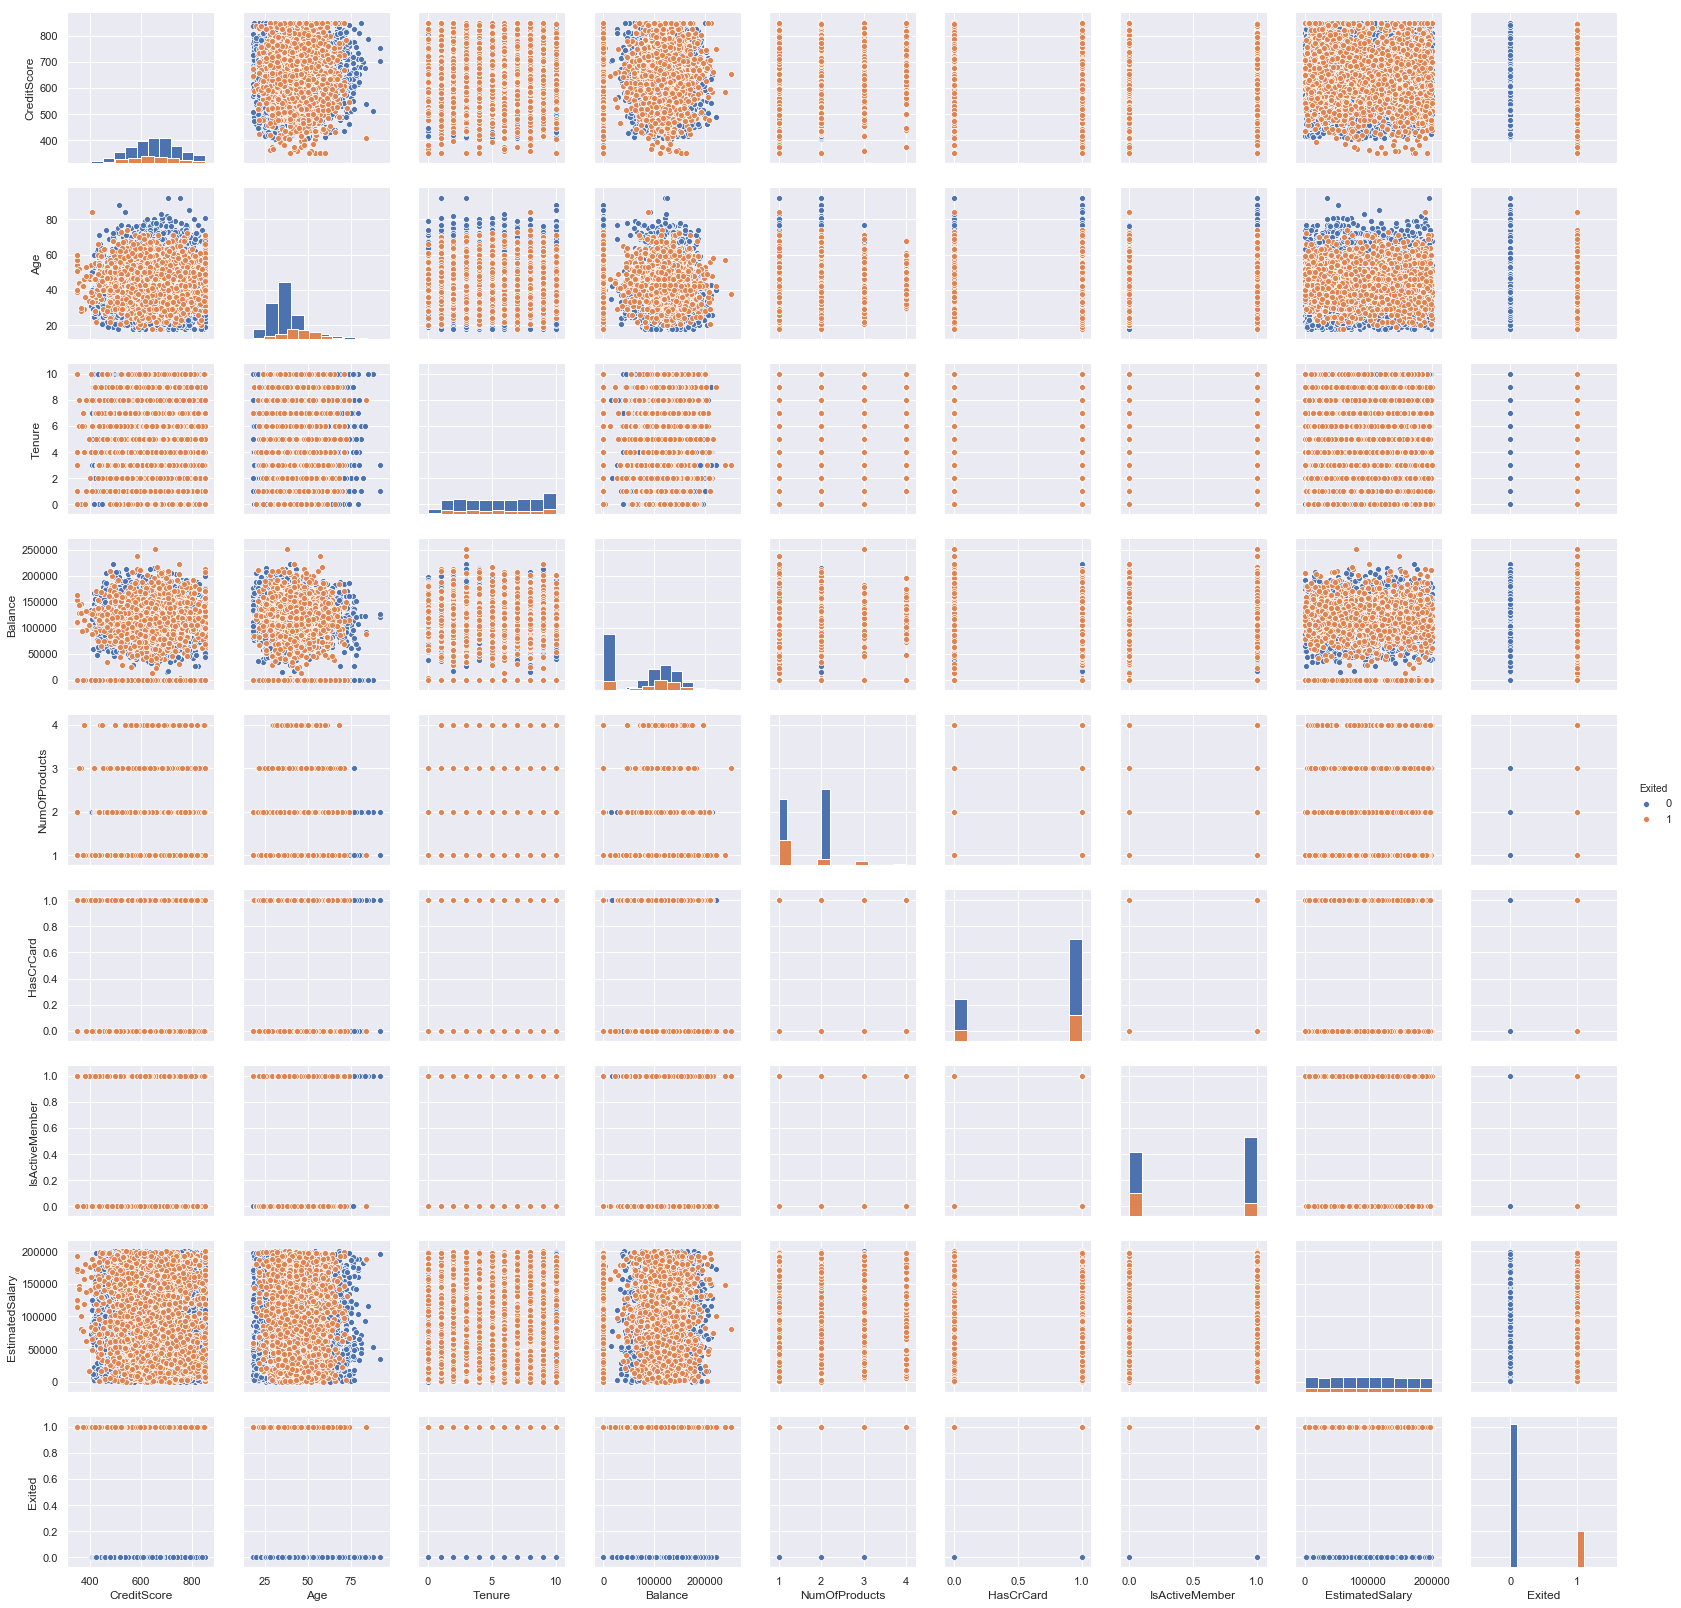

In [11]:
sns.set()
sns.pairplot(df2, hue='Exited', diag_kind="hist")

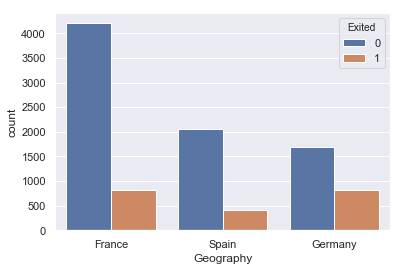

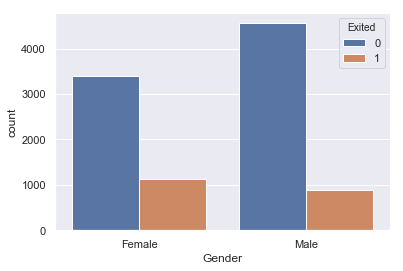

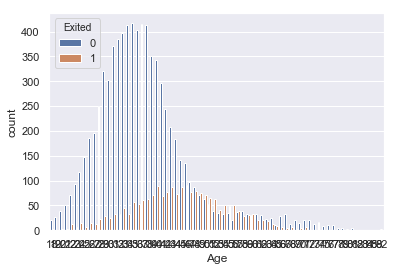

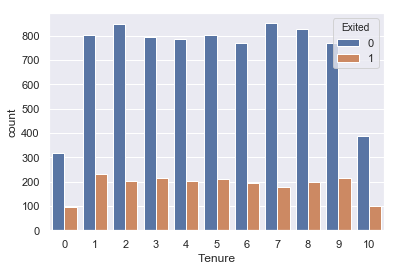

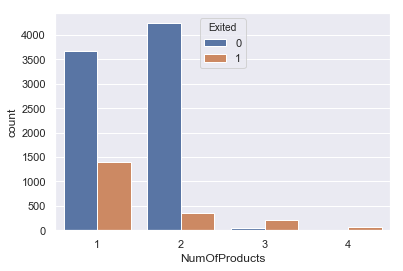

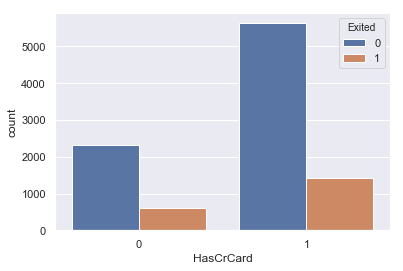

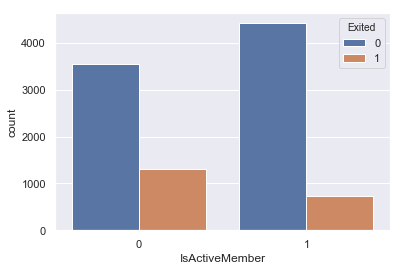

In [12]:
# examine all categorical features by our 'Exited' 'y'

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for f in features:
    plt.figure()
    ax=sns.countplot(x=f, data=df2, hue='Exited')

In [13]:
# Making Categorical Variable into numeric representation
df3 = pd.get_dummies(df2, columns=['Geography', 'Gender','HasCrCard','IsActiveMember'],) #drop_first=True)

In [14]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scale_columns=['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()

In [16]:
X = df3.drop('Exited', axis=1)
y = df3['Exited']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [19]:
X_train=scaler.fit_transform(X_train)

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
X_train

array([[0.532     , 0.72727273, 0.1       , ..., 1.        , 1.        ,
        0.        ],
       [0.464     , 0.33333333, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.668     , 0.22727273, 0.4       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.77      , 0.3030303 , 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.634     , 0.37878788, 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.694     , 0.5       , 0.1       , ..., 1.        , 0.        ,
        1.        ]])

In [21]:
X_test= scaler.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [23]:
# Set up the deicision tree! criteria based on lowest entropy

In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [26]:
import graphviz

dot_data = tree.export_graphviz(dt,out_file=None,
                               feature_names=df3.drop('Exited', axis=1).columns,
                               class_names=df3['Exited'].unique().astype(str),
                               filled=True,
                               rounded=True,
                               special_characters=True)

graph= graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [27]:
# Output Highest Feature Importance

for i, column in enumerate(df3.drop('Exited',axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    feat_imp = pd.DataFrame({'Variable':[column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try: 
        feat_imp2 = pd.concat([feat_imp2, feat_imp], ignore_index=True)
    except:
        feat_imp2 = feat_imp

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.598
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.402
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.000


In [28]:
final_feat_imp = feat_imp2.sort_values('Feature Importance Score', ascending = False).reset_index()

In [29]:
final_feat_imp

,index,Variable,Feature Importance Score
0,1,Age,0.598218
1,4,NumOfProducts,0.401782
2,0,CreditScore,0.000000
3,2,Tenure,0.000000
4,3,Balance,0.000000
5,5,EstimatedSalary,0.000000
6,6,Geography_France,0.000000
7,7,Geography_Germany,0.000000
8,8,Geography_Spain,0.000000
9,9,Gender_Female,0.000000


In [30]:
# Evaluating using score 

print('Training accuracy is: ', dt.score(X_train,y_train))
print('Testing accuracy is: ', dt.score(X_test,y_test))

Training accuracy is:  0.8175
Testing accuracy is:  0.82025


In [31]:
# Confusion Matrix in Seaborn! 

def plot_confusion_matrix(cm,classes=None, title = 'Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1.,annot=True,annot_kws={'size':20})
    else:
        sns.heatmap(cm,vmin=0.,vmax=1.)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

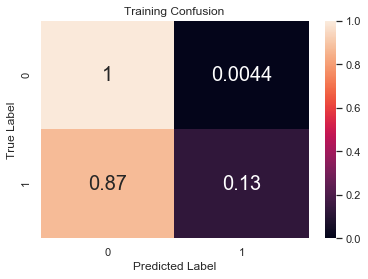

In [32]:
y_pred = dt.predict(X_train)

cm = confusion_matrix(y_train,y_pred)
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=dt.classes_,title='Training Confusion')

In [33]:
cm

array([[1583,    7],
       [ 358,   52]], dtype=int64)

In [34]:
# calculating False Positive(FP), False Negatives (FN), True Positivies (TP) and True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP+FN+TP)


In [35]:
# Sensitivity, hit rate, recall or true positive rate
TPR = TP/(TP+FN)
print('The True Positive Rate / Recall per call is: ',TPR)

# Precision of positive predictive value
PPV = TP/(TP+FP)
print('The precision per class is: ',PPV)

# False Positive rate of False Alarm Rate:
FPR = FP/(FP+TN)
print('The False Alarm rate per class is: ',FPR)

# False Negative Rate of Miss Rate
FNR = FN/(TP+FN)
print('The Miss Rate per class is: ',FNR)

# Classification Error
CER = (FP+FN)/(TP+FP+FN+TN)
print('The Classification error of each class is: ',CER)

# Overall Accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('The accuracy of each class is ',ACC)
print('')

# Total Averages:
print("The average Recall is: ",TPR.sum()/2)
print("The average Precision is: ",PPV.sum()/2)
print("The average False Alarm is: ",FPR.sum()/2)
print("The average Miss Rate is: ",FNR.sum()/2)
print("The average Classification Error is: ",CER.sum()/2)
print("The average Accuracy is: ",ACC.sum()/2)


The True Positive Rate / Recall per call is:  [0.99559748 0.12682927]
The precision per class is:  [0.81555899 0.88135593]
The False Alarm rate per class is:  [0.87317073 0.00440252]
The Miss Rate per class is:  [0.00440252 0.87317073]
The Classification error of each class is:  [0.1825 0.1825]
The accuracy of each class is  [0.8175 0.8175]

The average Recall is:  0.5612133762847062
The average Precision is:  0.8484574612073106
The average False Alarm is:  0.43878662371529376
The average Miss Rate is:  0.43878662371529376
The average Classification Error is:  0.1825
The average Accuracy is:  0.8175


# Random Forest 
#### Random Forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees
#### Takes the average (entropy/information gain) of many Decision Trees via bagging
#### Bagging is short for 'bootstrap aggregation' meaning that samples are chosen with replacement (bootstrapping) and combined(aggregated) by taking their average

In [36]:
# Create the Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [37]:
# fit the model
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# predict data
prediction_test = rf.predict(X=X_test)

In [39]:
print('Training Accuracy is: ',rf.score(X_train,y_train))
print("Testing Accuracy is: ",rf.score(X_test,y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.854625


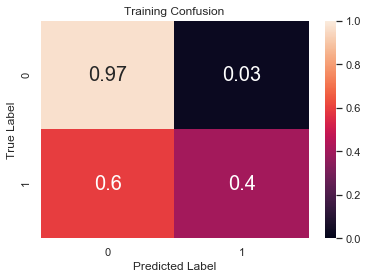

In [40]:
cm = confusion_matrix(y_test,prediction_test)
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=rf.classes_,title='Training Confusion')

## TUNING RANDOM FOREST

In [41]:
from itertools import product

n_estimators = 100
max_features = [1,'sqrt','log2']
max_depths = [None, 2,3,4,5]

Classification accuracy on test set with max features = 1 and max_depth = None: 0.835
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.799
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.803
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.855
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.802
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.814
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.827
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.842
Classification accuracy on test set with max features = log2 and max_depth = None: 0.855
Classification accuracy on test set with max features = log2

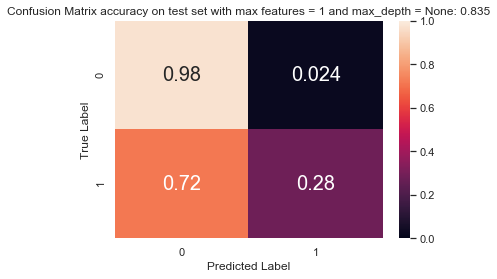

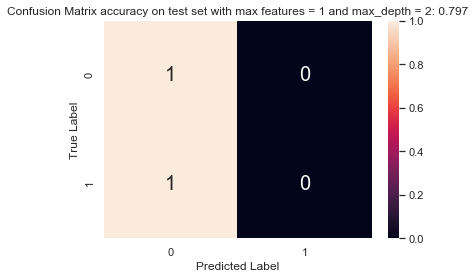

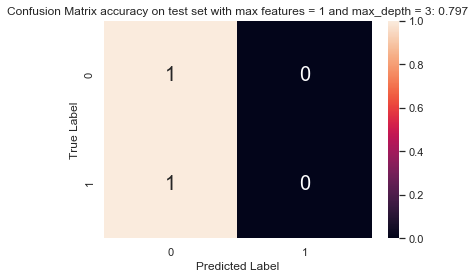

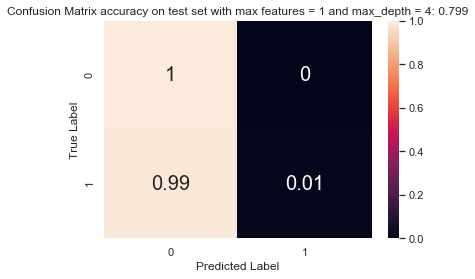

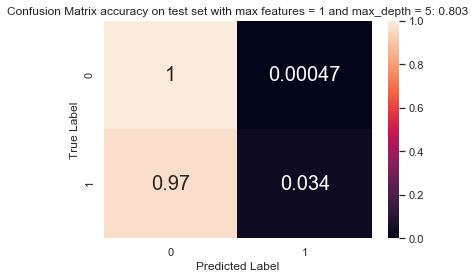

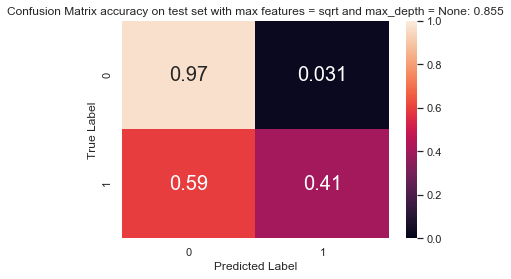

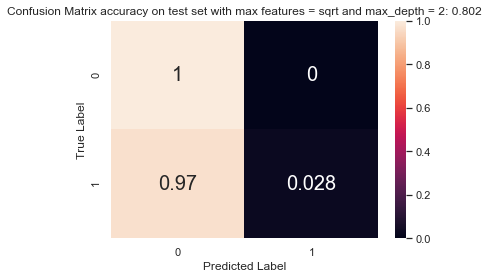

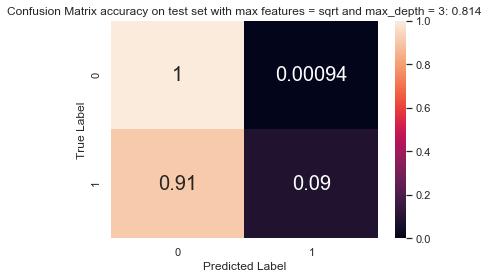

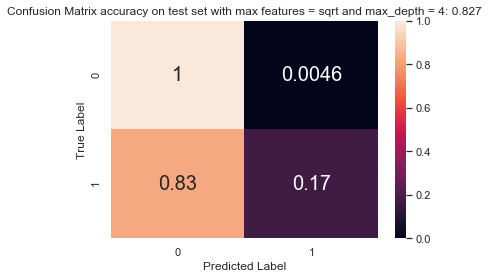

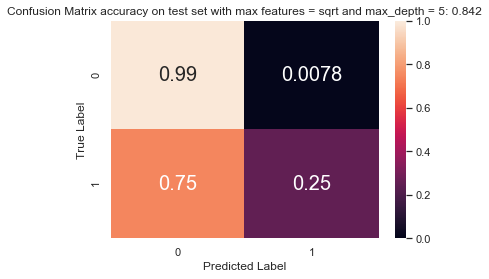

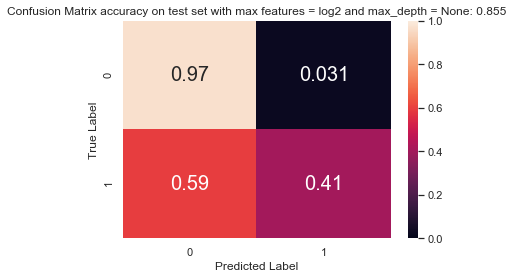

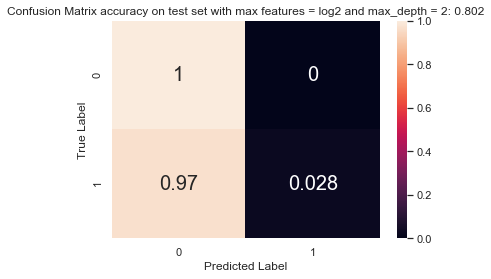

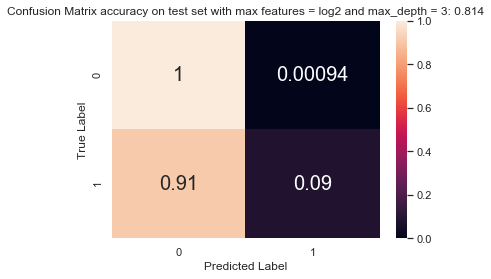

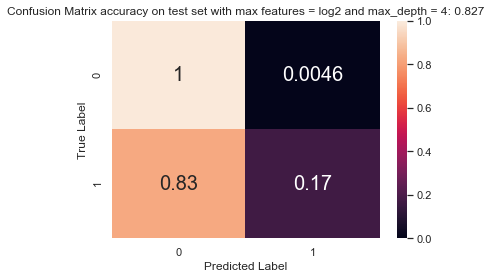

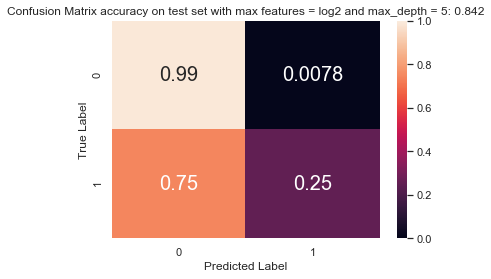

In [42]:
for f, d in product(max_features,max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators,
                               criterion = 'entropy',
                               max_features = f,
                               max_depth = d,
                               n_jobs=2, 
                               random_state=1337)
    
    rf.fit(X_train,y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f,d,accuracy_score(y_test,prediction_test)))
    
    cm = confusion_matrix(y_test,prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm,classes=rf.classes_,
                         title = 'Confusion Matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f,d,accuracy_score(y_test,prediction_test)))

## XGBoost
#### XGBoost is short for eXtreme Gradient Boosting
#### It is an ensemble model; ensemble models combines different machine learning models into one
#### Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models went wrong
#### XGBoost trains upon the residuals.  Instead of aggregating trees, gradient boosted trees learn from errors during each boosting round 

In [43]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [49]:
classifier = xgboost.XGBClassifier()

In [50]:
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[2,3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [51]:
# Search through a lot of different variables 
clf = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

In [52]:
# Run on all data as we will use unseen data later 
clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[12:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.8354809019788311, total=   0.1s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[12:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as int


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.8077542567878508, total=   0.1s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[12:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.8169964718515109, total=   0.0s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[12:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Exp

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_

[CV]  min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.8607531830035281, total=   0.1s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[12:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.8419619573554227, total=   0.0s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[12:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expl

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.830840619726952, total=   0.2s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[12:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.7960576775579077, total=   0.3s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[12:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.8045712532597025, total=   0.3s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[12:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.856994937873907, total=   0.2s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[12:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.8394692437490413, total=   0.2s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3 
[12:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3, score=0.8243979137904587, total=   0.1s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3 
[12:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3, score=0.7944086516336861, total=   0.2s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3 
[12:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3, score=0.8112440558367848, total=   0.1s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3 
[12:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3, score=0.824244516030066, total=   0.1s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3 
[12:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3, score=0.8167280257708237, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4 
[12:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, score=0.8419236079153244, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4 
[12:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, score=0.8037659150176407, total=   0.2s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4 
[12:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, score=0.810860561435803, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4 
[12:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, score=0.8584138671575394, total=   0.2s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4 
[12:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, score=0.8482512655315232, total=   0.2s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[12:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.8412716674336554, total=   0.1s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[12:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.8016566958122411, total=   0.3s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[12:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.8175717134529836, total=   0.1s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[12:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.8463337935266144, total=   0.1s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[12:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=6, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.8245513115508514, total=   0.1s
[12:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.3s finished
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [56]:
clf.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [53]:
# Grid Search outputs the best parameters for you!!! 
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=5, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [55]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=5, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [57]:
final_model.fit(X,y)

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=5, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [58]:
pred_xgboost = final_model.predict(X)

In [82]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,0,1,0,1


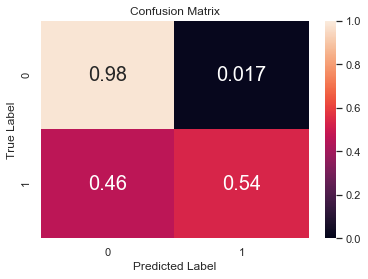

In [59]:
# Confusion Matrix
cm = confusion_matrix(y,pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=rf.classes_)

In [60]:
pwd

'C:\\Users\\cmosher\\Documents\\GitHub Programs\\AlpacaTradingFolder'

## LOAD IN UNSEEN DATA 

In [72]:
unseen = pd.read_csv('unseen_bank_churn_data.txt')

In [73]:
unseen.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
unseen.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [75]:
# Pre Processing Steps like Above 
unseen2 = unseen[[ 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [76]:
# Dummy Variables 
unseen2 = pd.get_dummies(unseen2, columns=['Geography','Gender','HasCrCard','IsActiveMember'])

In [77]:
unseen2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,0,1,0,1


In [78]:
# Scale the data 
scaled_feats = ['CreditScore','Balance','EstimatedSalary','Age']

unseen2[scaled_feats] = scaler.fit_transform(unseen2[scaled_feats]) 

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [79]:
unseen2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.342857,2,0.000000,1,0.507077,1,0,0,1,0,0,1,0,1
1,0.516,0.328571,1,0.334031,1,0.563089,0,0,1,1,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.570039,1,0,0,1,0,0,1,1,0
3,0.698,0.300000,1,0.000000,2,0.469437,1,0,0,1,0,1,0,1,0
4,1.000,0.357143,2,0.500246,1,0.395667,0,0,1,1,0,0,1,0,1


In [85]:
# Making Predictions 
pred_xgboost = final_model.predict(unseen2)

In [86]:
pred_prob_xgboost = final_model.predict_proba(unseen2)

In [87]:
# predicts whether client will churn or not 
pred_xgboost

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [88]:
# find the probability of whether they will be 0 or 1, 3rd person has a 67% probability of churning  
pred_prob_xgboost

array([[0.79097855, 0.20902142],
       [0.7538857 , 0.2461143 ],
       [0.3224702 , 0.6775298 ],
       ...,
       [0.74616396, 0.253836  ],
       [0.9483983 , 0.05160171],
       [0.7146865 , 0.28531352]], dtype=float32)

In [89]:
# Function to select second column for probabilities - will they CHURN!!!>!>!> ?!?!?
def column(matrix,i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost,1)

[0.20902142,
 0.2461143,
 0.6775298,
 0.124971874,
 0.2342064,
 0.0771649,
 0.05563964,
 0.71782273,
 0.067052126,
 0.20566574,
 0.08802368,
 0.08959,
 0.11532823,
 0.12824951,
 0.08136715,
 0.06127912,
 0.34845835,
 0.08077591,
 0.36006424,
 0.06712569,
 0.051166832,
 0.13453208,
 0.45593977,
 0.07063049,
 0.1858171,
 0.07063049,
 0.20495087,
 0.08153493,
 0.20441858,
 0.0725473,
 0.7448586,
 0.24121532,
 0.08732707,
 0.08136715,
 0.08077591,
 0.36350557,
 0.24534714,
 0.21523185,
 0.20359442,
 0.06030247,
 0.36172485,
 0.3568736,
 0.20902142,
 0.38138857,
 0.19385895,
 0.06851503,
 0.21400794,
 0.21400794,
 0.21967539,
 0.11400241,
 0.07787235,
 0.0951878,
 0.12824951,
 0.31958017,
 0.34845835,
 0.1883943,
 0.348816,
 0.33173797,
 0.45593977,
 0.19362026,
 0.35603163,
 0.12578653,
 0.09362395,
 0.18647154,
 0.20095672,
 0.0718557,
 0.38045818,
 0.049124453,
 0.0826431,
 0.35979766,
 0.70461047,
 0.348816,
 0.2633299,
 0.0718557,
 0.06204615,
 0.113093324,
 0.051166832,
 0.2029078,
 0

In [95]:
# Now join the client data with the predicitons whether they will churn 
output = unseen.copy()
output['Predicitons - Churn of Not'] = pred_xgboost
output['Predicitons - Probability to Churn'] = column(pred_prob_xgboost,1)
output['Predicitons - Churn or Not Desc'] = 'Empty'
output['Predicitons - Churn or Not Desc'][output['Predicitons - Churn of Not'] == 0] = 'Retention'
output['Predicitons - Churn or Not Desc'][output['Predicitons - Churn of Not'] == 1] = 'Loss'



C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [96]:
output.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicitons - Churn of Not,Predicitons - Probability to Churn,Predicitons - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.209021,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.246114,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0.677530,Loss
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.124972,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.234206,Retention
5,6,15574048,AP Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0.077165,Retention
6,7,15592567,AP Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0.055640,Retention
7,8,15656184,AP Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,0.717823,Loss
8,9,15792401,AP He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0.067052,Retention
9,10,15592425,AP H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,0.205666,Retention
